In [1]:
! pip install transformers

In [2]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

# ViT-accuracy model
# Add "-earlystop" at the end for Vit-valloss model
image_processor = AutoImageProcessor.from_pretrained("Towen/vit-base-patch16-224-in21k-finetuned")
model = AutoModelForImageClassification.from_pretrained("Towen/vit-base-patch16-224-in21k-finetuned")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

In [5]:
from PIL import Image
import torch
import requests
from io import BytesIO

# Load your image here
# Local path image
# image = Image.open("your_image.jpg")

# URL image
response = requests.get("https://i.natgeofe.com/n/55febcfd-0d6c-4ebe-9229-81e0b6aa7491/M2400651-Pneumonia_4x3.jpg", stream=True)
# Convert the response content into a BytesIO object
# This acts like a file object that PIL can read from
image = Image.open(BytesIO(response.content))

# prepare image for the model
encoding = image_processor(image.convert("RGB"), return_tensors="pt")
# forward pass
with torch.no_grad():
    outputs = model(**encoding)
    logits = outputs.logits

predicted_class_idx = logits.argmax(-1).item()

print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: PNEUMONIA


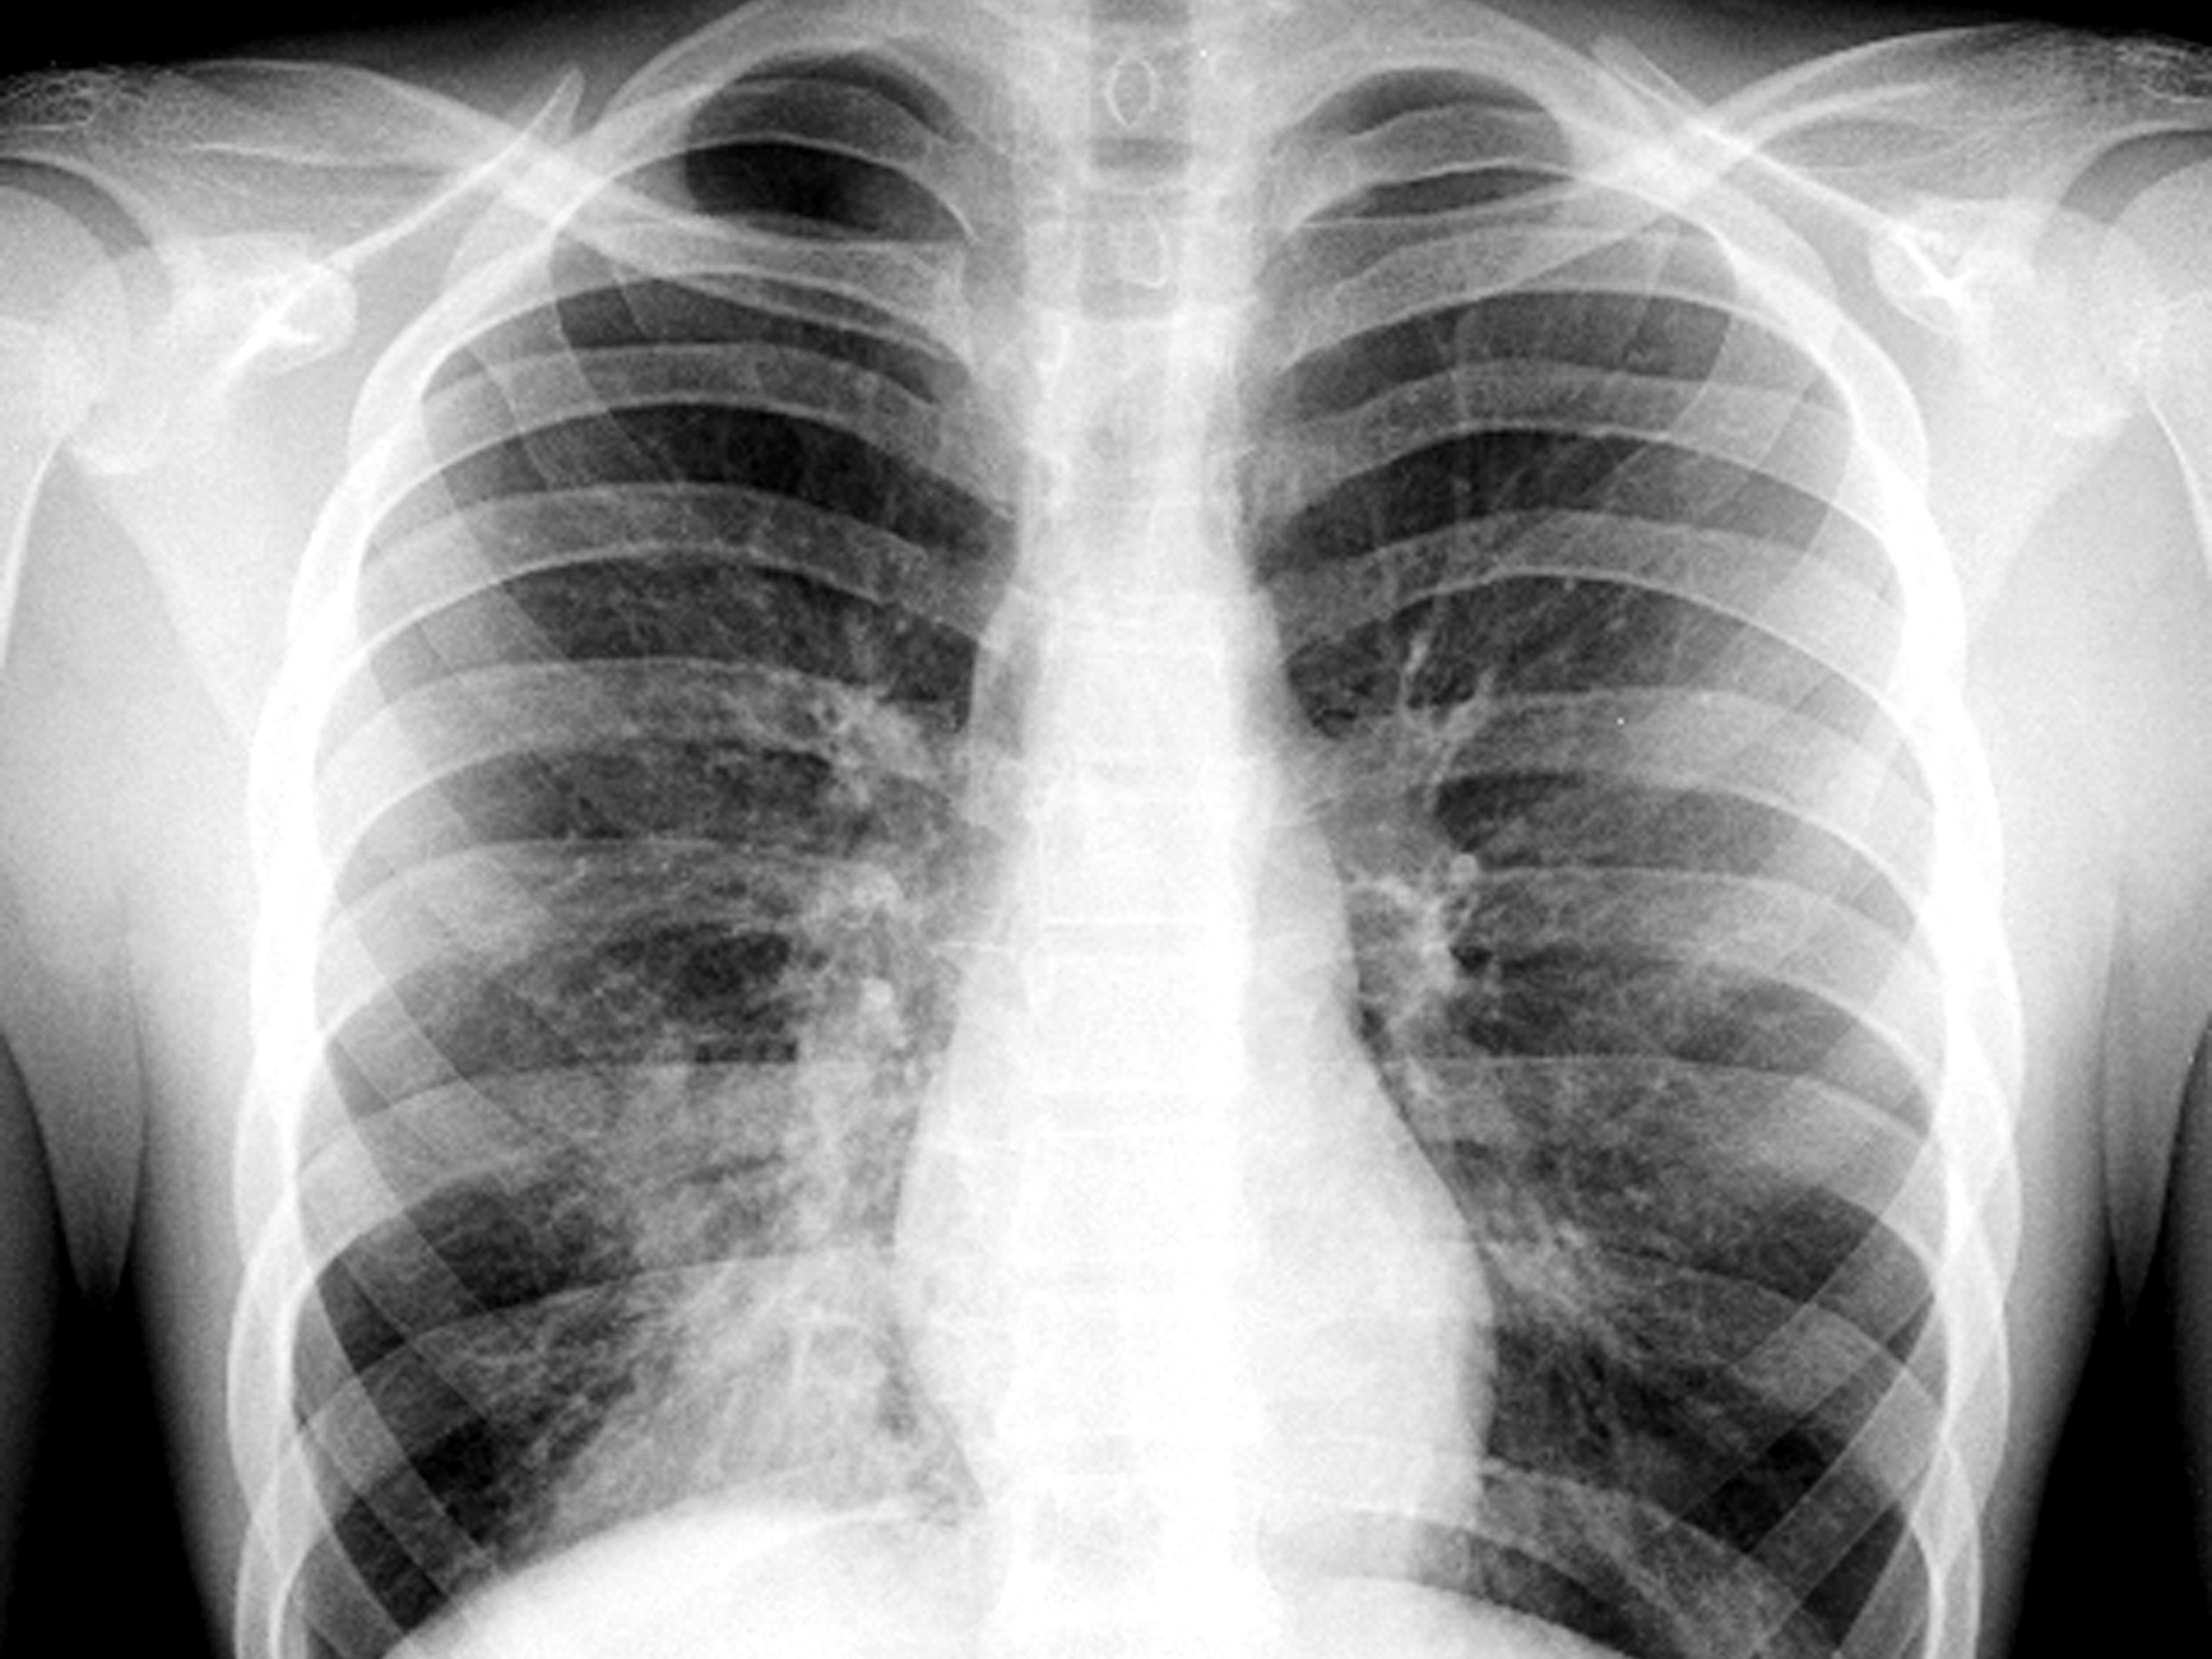

In [6]:
image